In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [14]:
#Задаем параметры
nx = 31 #количество точек по x
ny = 31 #количество точек по y
dx = 3 / (nx - 1) #шаг по x
dy = 3 / (ny - 1) #шаг по y
#создаем дискретные пространства по x и y
x = np.linspace(0, 3, nx)
y = np.linspace(0, 3, ny)
#создаем массив u и f
u = np.zeros((ny, nx))
f = np.zeros((ny, nx))
#создаем матрицы A, B, C, D
A = np.zeros((ny, nx))
B = np.zeros((ny, nx))
D = np.zeros((ny, nx))
#Создаем массивы alpha и beta
alpha = np.zeros((nx - 1, ny, nx))
beta = np.zeros((ny, nx - 1))
#краевое условие beta для левого границы
beta[:, 0] = 0
#краевые условия для вверхней и нижней границы
D[0, :11] = - 1 / (dy * dy)
D[-1, 10:21] = - 1 / (dy * dy)

In [15]:
#заполняем матрицу A
for i in range(ny):
    for j in range(nx):
        if (i == j):
            A[i][j] = 1.0 / (dx * dx)
#заполняем матрицу B
for i in range(ny):
    for j in range(nx):
        if (i == j):
            B[i][j] = -(2.0 / (dx * dx)) - (2.0 / (dy * dy))
        elif (i == j - 1):
            B[i][j] = 1 / (dy * dy)
        elif (i == j + 1):
            B[i][j] = 1 / (dy * dy)
#матрица C = A
C = A.copy()

In [16]:
#находим все alpha и beta
for k in range(1, nx - 1):
    alpha[k, :, :] = np.dot(-np.linalg.inv(B + np.dot(C , alpha[k - 1, :, :])), A)
    beta[:, k] = np.dot(np.linalg.inv(B + np.dot(C , alpha[k - 1, :, :])), (D[:, k] - (np.dot(C, beta[:, k - 1]))))
#вычисляем значения u 
for k in range(nx - 2, -1, -1):
    u[:, k] = np.dot(alpha[k, :, :], u[:, k + 1]) + beta[:, k]

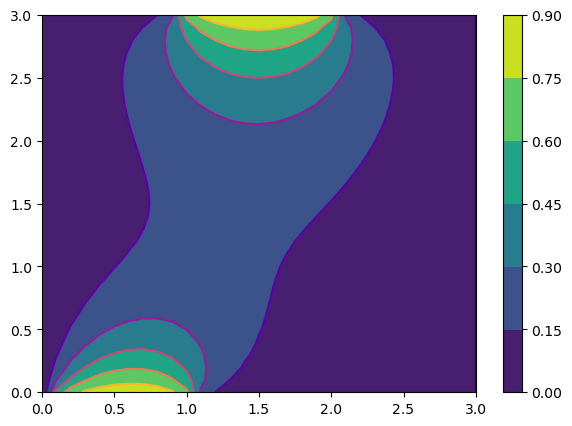

In [18]:
#рисуем график
X, Y = np.meshgrid(x, y)
plt.figure(figsize=(7, 5), dpi=100)
plt.contourf(X, Y, u, alpha=1., cmap=cm.viridis)
plt.colorbar()
plt.contour(X, Y, u, cmap=cm.plasma)
plt.savefig("Poisson2D.png")
plt.show()